Exploratory data analysis and Feature enginerring on the last stage to model building and training

In [26]:
# Importing necessary lebraries
import numpy as np
import pandas as pd
import os
import sys
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import plotly.io as pio
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

In [27]:
sys.path.append(os.path.join(os.path.abspath('..')))

In [28]:
# Import modules
from src import data_loading as dl
from src import data_summarry as ds
from src import formatting as fm
from src import univariate_analysis as uv
from src.utils import *
from scripts.feature_engineering import *

In [29]:
# Load the data set 
fraud_data_with_country = dl.load_data("processed/fraud_data_with_country.csv") # Includes e-commerce transaction data aimed at identifying fraudulent activities.
credit_card= dl.load_data("processed/creditcard_processed.csv") # Maps IP addresses to countries

In [30]:
# Converting date column to datetime format 
fraud_data_with_country['signup_time'] = pd.to_datetime(fraud_data_with_country['signup_time'])
fraud_data_with_country['purchase_time'] = pd.to_datetime(fraud_data_with_country['purchase_time'])

In [31]:
# Call the function with your DataFrame and datetime columns
datetime_columns = ['signup_time', 'purchase_time']
fraud_data_with_country = extract_datetime_features(fraud_data_with_country, datetime_columns)

In [32]:
# Perform feature engineering
fraud_data_with_country = extract_time_features(fraud_data_with_country)
fraud_data_with_country = create_device_browser_combination(fraud_data_with_country)
fraud_data_with_country = create_country_source_combination(fraud_data_with_country)

In [33]:
fraud_data_with_country.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,signup_time_year,signup_time_month,purchase_time_hour,purchase_time_day,purchase_time_year,purchase_time_month,hour_of_day,day_of_week,device_browser_combination,country_source_combination
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,1.677886e+07,...,2015,6,3,6,2015,8,3,6,KIXYSVCHIPQBR_Safari,Australia_SEO
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,1.684205e+07,...,2015,1,20,2,2015,2,20,2,PKYOWQKWGJNJI_Chrome,Thailand_SEO
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,1.684366e+07,...,2015,3,23,5,2015,4,23,5,LVCSXLISZHVUO_IE,China_Ads
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,1.693873e+07,...,2015,2,16,5,2015,5,16,5,UHAUHNXXUADJE_Chrome,China_Direct
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,1.697198e+07,...,2015,7,4,1,2015,11,4,1,XPGPMOHIDRMGE_Chrome,Thailand_SEO


In [34]:
# Calculate transaction features
fraud_data_with_country = calculate_transaction_features(fraud_data_with_country)

In [35]:
fraud_data_with_country['time_to_purchase'] = (fraud_data_with_country['purchase_time'] - fraud_data_with_country['signup_time']).dt.total_seconds()

In [36]:
# Column seconds_since_signup
fraud_data_with_country["seconds_since_signup"]= (fraud_data_with_country.purchase_time - fraud_data_with_country.signup_time).apply(lambda x : x.total_seconds())

In [37]:
# Column "quick_purchase" : categorise time between sign_up and purchase
fraud_data_with_country["quick_purchase"] = fraud_data_with_country.seconds_since_signup.apply(lambda x : 1 if x < 30 else 0)

In [38]:
# Call the function with your DataFrame
analyze_fraud_patterns(fraud_data_with_country)

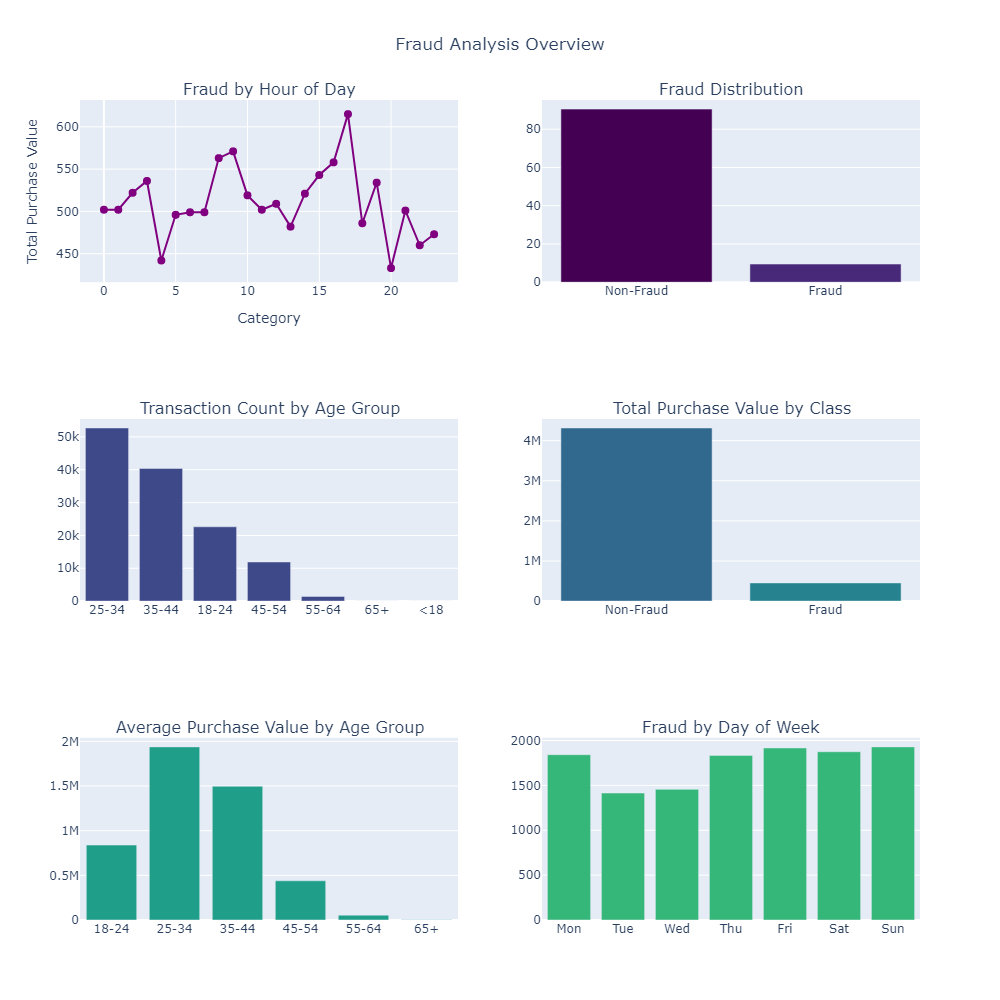

In [39]:
#  Display the saved image
Image(filename='../Visual/analyzing_fraud_patterns.png')

In [40]:
columns_to_drop = [
    "user_id",
    "signup_time",
    "ip_address_int",
    "purchase_time",
    "ip_address",
    "device_id",
    "source",
    "browser",
    "age"
]

fraud_data_with_country.drop(columns=columns_to_drop, inplace=True)

In [41]:
fraud_data_with_country.dropna(inplace = True)

In [42]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [43]:
# Normalize and scale numeric features using StandardScaler
numeric_cols = fraud_data_with_country.select_dtypes(include=['int64', 'float64', 'int32']).columns
numeric_cols = [col for col in numeric_cols if col != 'class']
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

fraud_data_with_country[numeric_cols] = rob_scaler.fit_transform(fraud_data_with_country[numeric_cols])


In [44]:
# Normalize the numeric features using MinMaxScaler
normalizer = MinMaxScaler()
fraud_data_with_country[numeric_cols] = normalizer.fit_transform(fraud_data_with_country[numeric_cols])

In [45]:
# Encode categorical features using One-Hot Encoding with sparse output
categorical_cols = fraud_data_with_country.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'class']
ohe = OneHotEncoder(sparse_output=True)  # Keep it sparse
ohe_data = ohe.fit_transform(fraud_data_with_country[categorical_cols])
ohe_df = pd.DataFrame.sparse.from_spmatrix(ohe_data, columns=ohe.get_feature_names_out(categorical_cols))

# Combine the encoded features with the original DataFrame and drop original categorical columns
fraud_data_with_country_concat = pd.concat([fraud_data_with_country, ohe_df], axis=1)
fraud_data_with_country_final = fraud_data_with_country_concat.drop(categorical_cols, axis=1)

In [50]:
fraud_data_with_country_final.sample(5)

,purchase_value,class,signup_time_hour,signup_time_day,signup_time_year,signup_time_month,purchase_time_hour,purchase_time_day,purchase_time_year,purchase_time_month,...,country_source_combination_Viet Nam_SEO,country_source_combination_Virgin Islands (U.S.)_Direct,country_source_combination_Virgin Islands (U.S.)_SEO,country_source_combination_Yemen_SEO,country_source_combination_Zambia_Ads,country_source_combination_Zambia_Direct,country_source_combination_Zambia_SEO,country_source_combination_Zimbabwe_Ads,country_source_combination_Zimbabwe_Direct,country_source_combination_Zimbabwe_SEO
17029,0.062069,0,0.347826,1.000000,0.0,0.857143,0.521739,0.500000,0.0,0.818182,...,0,0,0,0,0,0,0,0,0,0
64414,0.206897,0,0.434783,0.333333,0.0,0.428571,0.826087,0.166667,0.0,0.636364,...,0,0,0,0,0,0,0,0,0,0
78634,0.103448,0,0.739130,0.500000,0.0,0.000000,0.739130,0.833333,0.0,0.090909,...,0,0,0,0,0,0,0,0,0,0
947,0.275862,0,0.347826,0.666667,0.0,0.428571,0.304348,0.833333,0.0,0.545455,...,0,0,0,0,0,0,0,0,0,0
110922,0.179310,0,0.782609,1.000000,0.0,0.428571,0.478261,0.166667,0.0,0.363636,...,0,0,0,0,0,0,0,0,0,0


## Encoding credit card

In [47]:
# RobustScaler is less prone to outliers.
credit_card['scaled_amount'] = rob_scaler.fit_transform(credit_card['Amount'].values.reshape(-1,1))
credit_card['scaled_time'] = rob_scaler.fit_transform(credit_card['Time'].values.reshape(-1,1))

credit_card.drop(['Time','Amount'], axis=1, inplace=True)

In [48]:
scaled_amount = credit_card['scaled_amount']
scaled_time = credit_card['scaled_time']

credit_card.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
credit_card.insert(0, 'scaled_amount', scaled_amount)
credit_card.insert(1, 'scaled_time', scaled_time)

credit_card_final = credit_card.copy()
# Amount and Time are Scaled!

credit_card_final.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.774718,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.268530,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.959811,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.411487,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.667362,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [ ]:
# Save preprocessed data 
fraud_data_with_country_final.to_csv('../data/cleaned/fraud_data_preprocessed.csv', index=False)
credit_card_final.to_csv('../data/cleaned/creditcard_preprocessed.csv', index=False)